In [1]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [2]:
print(len(messages))

5574


In [3]:
for msg_index, msg in enumerate(messages):
    print(msg_index, msg)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv(
    'smsspamcollection/SMSSpamCollection',
    sep='\t',
    names=['label', 'message']
)
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: ylabel='Frequency'>

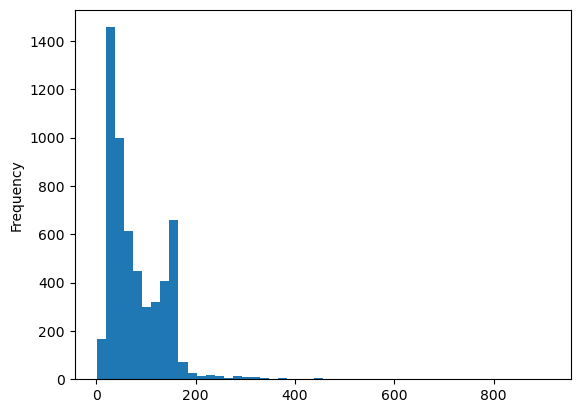

In [10]:
messages['length'].plot(bins=50, kind='hist')

In [11]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

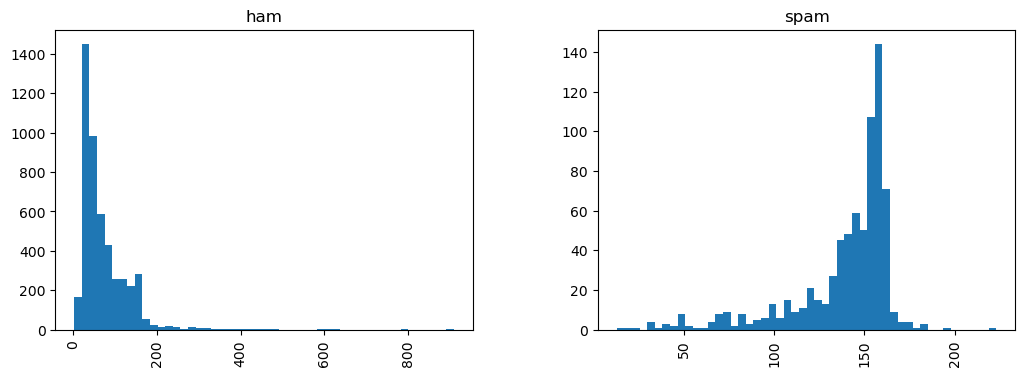

In [14]:
messages.hist(column='length', by='label', bins=50, figsize=(12,4))

In [15]:
messages[messages['label'] == 'spam'].describe()

,length
count,747.000000
mean,138.670683
std,28.873603
min,13.000000
25%,133.000000
50%,149.000000
75%,157.000000
max,223.000000


## Text Pre-Processing

In [16]:
import string

In [17]:
mess = 'Sample message! Notice: it has punctuation'

#### Remove Punication

In [18]:
# Check characters to see if they are punication
nopunc = [char for char in mess if char not in string.punctuation]

In [19]:
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [20]:
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


#### Remove stopwords

In [21]:
import nltk
from nltk.corpus import stopwords

In [22]:
# nltk.download_shell() 
# nltk shell downloader - 'Interface gráfica para realizar o download'

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kauas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords.words('english')[:20]
# Stopwords são palavras muito usadas de um idioma, mas que
# geralmente não contem informações relevantes

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [25]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [26]:
print(clean_mess)

['Sample', 'message', 'Notice', 'punctuation']


In [27]:
def text_process(message: str = ''):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    # Remove punctuation
    no_punication = [char for char in message if char not in string.punctuation]
    
    # Join the characteres again to from the string
    no_punication_message = ''.join(no_punication)

    # Remove stop words
    return [word for word in no_punication_message.split() if word not in stopwords.words('english')]

In [28]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

### Vectorization

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(
    analyzer=text_process
).fit(messages['message'])

print(len(bow_transformer.vocabulary_))

11617


In [31]:
print(bow_transformer)

CountVectorizer(analyzer=<function text_process at 0x7f6cf22a63b0>)


In [32]:
print(bow_transformer.vocabulary_)

{'Go': 2113, 'jurong': 7747, 'point': 9109, 'crazy': 5961, 'Available': 1133, 'bugis': 5410, 'n': 8528, 'great': 7129, 'world': 11355, 'la': 7860, 'e': 6409, 'buffet': 5409, 'Cine': 1521, 'got': 7098, 'amore': 4845, 'wat': 11157, 'Ok': 3177, 'lar': 7893, 'Joking': 2535, 'wif': 11264, 'u': 10890, 'oni': 8782, 'Free': 1993, 'entry': 6523, '2': 423, 'wkly': 11315, 'comp': 5811, 'win': 11276, 'FA': 1882, 'Cup': 1589, 'final': 6749, 'tkts': 10704, '21st': 443, 'May': 2896, '2005': 430, 'Text': 4095, '87121': 871, 'receive': 9444, 'questionstd': 9351, 'txt': 10878, 'rateTCs': 9392, 'apply': 4923, '08452810075over18s': 73, 'U': 4221, 'dun': 6396, 'say': 9746, 'early': 6414, 'hor': 7378, 'c': 5453, 'already': 4821, 'Nah': 3047, 'I': 2362, 'dont': 6315, 'think': 10625, 'goes': 7069, 'usf': 10991, 'lives': 8034, 'around': 4969, 'though': 10642, 'FreeMsg': 1995, 'Hey': 2290, 'darling': 6056, '3': 543, 'weeks': 11203, 'word': 11342, 'back': 5085, 'Id': 2424, 'like': 7992, 'fun': 6947, 'still': 102

In [33]:
message4 = messages['message'][3]

In [34]:
print(message4)

U dun say so early hor... U c already then say...


In [35]:
# Vector Representation
bow4 = bow_transformer.transform([message4])
print(bow4)
print()
print(bow4.shape)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2

(1, 11617)


In [36]:
# 7 palavras unicas, sendo que duas delas aparecem 2 vezes

print(bow_transformer.get_feature_names_out()[4221])
print(bow_transformer.get_feature_names_out()[9746])

# Essas palavras se repetem 2 vezes

U
say


In [37]:
messages_bow = bow_transformer.transform(messages['message'])

In [38]:
print(f'Shape of Sparse Matrix: {messages_bow.shape}')
print(f'Amount of Non-Zero occurences: {messages_bow.nnz}')

Shape of Sparse Matrix: (5572, 11617)
Amount of Non-Zero occurences: 56024


In [39]:
sparsity = (100 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print(f'Sparity: {round(sparsity)}')

Sparity: 0


After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)

In [42]:
print(tfidf4)

  (0, 9746)	0.5385626262927564
  (0, 7378)	0.4389365653379857
  (0, 6414)	0.3187216892949149
  (0, 6396)	0.29953799723697416
  (0, 5453)	0.29729957405868723
  (0, 4821)	0.26619801906087187
  (0, 4221)	0.40832589933384067


In [43]:
# Check IDF of the words 'u' and 'university'
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [44]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11617)


In [45]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [46]:
messages.describe().T
#https://youtu.be/qOIZbJ0IH2k?t=955

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.48995,59.942907,2.0,36.0,62.0,122.0,910.0


## Training a model

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=.2)

In [49]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [50]:
from sklearn.naive_bayes import MultinomialNB 
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [51]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


## Model Evaluation

In [52]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## Create a Data Pipeline

In [55]:
from sklearn.pipeline import Pipeline

In [56]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [57]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f6cf22a63b0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [58]:
predictions = pipeline.predict(msg_test)

In [59]:
print(classification_report(predictions, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       995
        spam       0.74      1.00      0.85       120

    accuracy                           0.96      1115
   macro avg       0.87      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

